In [3]:
"""
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

"""

'\n開始前，必須先去下載 GCP 為我們搜集的Log\n並把名字改為 downloaded-logs.csv\n上傳到colab\n\n'

In [4]:
"""
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/

"""

import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.message,jsonPayload.python_logger,logName,receiveTimestamp,resource.labels.project_id,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace
0,HTTP/1.1,POST,http://ai-class-practice-0526-4huzoihhra-df.a....,LineBotWebhook/2.0,1wjlli7g83sipf1,"{""destination"":""U9fd3987f52c7db25f9435f8f3992e...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-06-02T06:59:54.429905956Z,project-ai-gcp-tutorial,global,INFO,/app/app.py,callback,68,2946947309991844766,2021-06-02T06:59:54.319480Z,projects/project-ai-gcp-tutorial/traces/3ab872...
1,HTTP/1.1,POST,http://ai-class-practice-0526-4huzoihhra-df.a....,LineBotWebhook/2.0,1f2djsbf6pdj72,"{""destination"":""U9fd3987f52c7db25f9435f8f3992e...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-06-02T06:59:52.670166334Z,project-ai-gcp-tutorial,global,INFO,/app/app.py,callback,68,12798622606547013840,2021-06-02T06:59:52.643040Z,projects/project-ai-gcp-tutorial/traces/1a24d0...
2,HTTP/1.1,POST,http://ai-class-practice-0526-4huzoihhra-df.a....,LineBotWebhook/2.0,641x5ug80sqcy0,"{""destination"":""U9fd3987f52c7db25f9435f8f3992e...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-06-02T06:59:51.085747320Z,project-ai-gcp-tutorial,global,INFO,/app/app.py,callback,68,17564059833103301795,2021-06-02T06:59:51.055991Z,projects/project-ai-gcp-tutorial/traces/6b3d9a...
3,HTTP/1.1,POST,http://ai-class-practice-0526-4huzoihhra-df.a....,LineBotWebhook/2.0,1qzkr4vg87u76bi,"{""destination"":""U9fd3987f52c7db25f9435f8f3992e...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-06-02T06:59:48.568486393Z,project-ai-gcp-tutorial,global,INFO,/app/app.py,callback,68,14841509247389316068,2021-06-02T06:59:48.540530Z,projects/project-ai-gcp-tutorial/traces/9568cf...
4,HTTP/1.1,POST,http://ai-class-practice-0526-4huzoihhra-df.a....,LineBotWebhook/2.0,2hybrig5quf8al,"{""destination"":""U9fd3987f52c7db25f9435f8f3992e...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-06-02T06:59:43.430502550Z,project-ai-gcp-tutorial,global,INFO,/app/app.py,callback,68,16458134801758876492,2021-06-02T06:59:40.279038Z,projects/project-ai-gcp-tutorial/traces/0f8cb0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,HTTP/1.1,POST,http://0e560014ab91.ap.ngrok.io/callback,LineBotWebhook/2.0,1qfm1e9f22x9g1,"{""destination"":""Uebc2d32380c52ffc70f8e34b94e80...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-05-26T13:14:19.986494647Z,project-ai-gcp-tutorial,global,INFO,/home/j29829181/05-26AI-PJ/app.py,callback,55,,2021-05-26T13:14:19.969288Z,NaN
2290,HTTP/1.1,POST,http://0e560014ab91.ap.ngrok.io/callback,LineBotWebhook/2.0,ftiyl5f30ram4,"{""destination"":""Uebc2d32380c52ffc70f8e34b94e80...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-05-26T13:14:19.568837595Z,project-ai-gcp-tutorial,global,INFO,/home/j29829181/05-26AI-PJ/app.py,callback,55,,2021-05-26T13:14:19.552199Z,NaN
2291,HTTP/1.1,POST,http://0e560014ab91.ap.ngrok.io/callback,LineBotWebhook/2.0,tz4w6gf27hp6b,"{""destination"":""Uebc2d32380c52ffc70f8e34b94e80...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-05-26T13:14:16.850820402Z,project-ai-gcp-tutorial,global,INFO,/home/j29829181/05-26AI-PJ/app.py,callback,55,,2021-05-26T13:14:12.758374Z,NaN
2292,HTTP/1.1,POST,http://4e6e407f1b67.ap.ngrok.io/callback,LineBotWebhook/2.0,hhrw07g1gxclma,"{""destination"":""Uebc2d32380c52ffc70f8e34b94e80...",user_event,projects/project-ai-gcp-tutorial/logs/user_event,2021-05-26T09:11:22.333660862Z,project-ai-gcp-tutorial,global,INFO,/home/j29829181/05-26AI-PJ/app.py,callback,55,,2021-05-26T09:11:22.315428Z,NaN


In [5]:
"""
抓出上述DF的指定欄位 (用戶傳給我們的訊息) => jsonPayload.message

"""

data["jsonPayload.message"]

0       {"destination":"U9fd3987f52c7db25f9435f8f3992e...
1       {"destination":"U9fd3987f52c7db25f9435f8f3992e...
2       {"destination":"U9fd3987f52c7db25f9435f8f3992e...
3       {"destination":"U9fd3987f52c7db25f9435f8f3992e...
4       {"destination":"U9fd3987f52c7db25f9435f8f3992e...
                              ...                        
2289    {"destination":"Uebc2d32380c52ffc70f8e34b94e80...
2290    {"destination":"Uebc2d32380c52ffc70f8e34b94e80...
2291    {"destination":"Uebc2d32380c52ffc70f8e34b94e80...
2292    {"destination":"Uebc2d32380c52ffc70f8e34b94e80...
2293    {"destination":"Uebc2d32380c52ffc70f8e34b94e80...
Name: jsonPayload.message, Length: 2294, dtype: object

In [23]:
"""
將上述抓取的jsonPayload.message欄位內容  =>  轉成csv

若欄位無值(None)  =>  則不填

"""

import json

# 設定一個json_data_list「準備存放」上面的jsonPayload.message欄位所讀取的資料
json_data_list = []


# 建立一個DataFrame表格，並設立欄位，欄位名稱為["userId", "timestamp", "event_type", "message_type", "message_id", "message_text"]
df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])


# 使用for迴圈，讀取jsonPayload.message的每一筆資料
for row in data["jsonPayload.message"]:
  
  # 每筆row都是一個json字串
  # 讀取json字串，然後得到events的欄位，第一筆資料的值
  try:
    events = json.loads(row).get("events")[0]
    # 打印出來看看是否正確
    print(json.loads(row).get("events")[0])
  
  except:
    pass
  
  
#   # json_data_list.append()
#   # print(line_event.get("type"))
#   # print(line_event.get("message"))
#   # print(line_event.get("message").get("id"))
#   # print(line_event.get("timestamp"))
#   # print(line_event.get("source").get("userId"))
  

  # 以下兩個ID傳太多訊息會統計失真
  # U3741b2fcdd172578b072465a8b6a8fa3    
  # Ud288602da162be970ccf0740c9ee0665
  if events.get("source").get("userId") == "U3741b2fcdd172578b072465a8b6a8fa3" or events.get("source").get("userId") == "Ud288602da162be970ccf0740c9ee0665":
    pass
  else:
    # 若事件不為關注、封鎖、回傳動作事件
    if events.get("type") not in ["follow", "unfollow", "postback", ""]:
        df_message = df_message.append(
        {
          "userId": events.get("source").get("userId"), 
          "timestamp": events.get("timestamp"), 
          "event_type": events.get("type"),
          "message_type": events.get('message').get("type"),
          "message_id": events.get("message").get("id"),
          "message_text": events.get("message").get("text")
        },
        ignore_index=True)

    # 如果是回傳動作
    elif events.get("type") in ["postback"]:
      df_message =df_message.append(
          {
            "userId": events.get("source").get("userId"), 
            "timestamp": events.get("timestamp"), 
            "event_type": events.get("type"),
            "message_text": events.get("postback").get("data")
          },
          ignore_index=True
      )

    # 若是關注與封鎖事件
    else:
      df_message = df_message.append(
          {
            "userId": events.get("source").get("userId"), 
            "timestamp": events.get("timestamp"), 
            "event_type": events.get("type")
          },
          ignore_index=True)

df_message

{'type': 'message', 'message': {'type': 'text', 'id': '14156055085506', 'text': '(接完電話一直處於緊張狀態…晚上也睡不太著)'}, 'timestamp': 1622617193860, 'source': {'type': 'user', 'userId': 'Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9'}, 'replyToken': '4ec681dd96d6444eb277f640cd06ce6c', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14156054958024', 'text': '(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！)'}, 'timestamp': 1622617192091, 'source': {'type': 'user', 'userId': 'Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9'}, 'replyToken': '898dfe9b43f54e5cb9eb0d1f81d104f5', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14156054825620', 'text': '(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！)'}, 'timestamp': 1622617190450, 'source': {'type': 'user', 'userId': 'Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9'}, 'replyToken': '911feaf4ba7048b297aaf387875f2efb', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14156054646583', 'text': '走吧'}, 'timestamp': 1622617187969, 'source': {'type': 'user', 'userId': 'U

,userId,timestamp,event_type,message_type,message_id,message_text
0,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617193860,message,text,14156055085506,(接完電話一直處於緊張狀態…晚上也睡不太著)
1,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617192091,message,text,14156054958024,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！)
2,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617190450,message,text,14156054825620,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！)
3,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617187969,message,text,14156054646583,走吧
4,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617178361,message,text,14156053905292,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！)
...,...,...,...,...,...,...
993,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477154504,message,text,14147096549366,原來不是只有我壓力大而已......
994,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477131535,message,text,14147095317740,反正也沒事，看看吧
995,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477101114,message,text,14147093694460,今天考試又沒考好，打工作也因忍不住脾氣跟爛顧客起衝突被炒魷魚
996,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477094344,message,text,14147093334483,(機車：波波波波波排氣音)


In [7]:
# 安裝line 套件
!pip install line-bot-sdk

     |████████████████████████████████| 71kB 2.6MB/s 


In [8]:
"""
設置Line Bot Api 的 Channel access token
"""

from linebot import LineBotApi, WebhookHandler

line_bot_api = LineBotApi("7qapAmlg4S7ysPfW3sC/D22VN45IgPrIpXHVngn2Uy51F7+r2NRjt6RYGwdu16Bzd6zEIltmtgB3KJqop+52MGGWjMqALiNywZSzX6aG+SMRCnQvMzuSoT+PHJt65p9hJqd8p5KoxJLCarcRc7b5wAdB04t89/1O/w1cDnyilFU=")

In [18]:
"""
取出用戶id，向Line要個資
整理成一份用戶個資名單
"""

# 依據先前的CSV，它裡面的用戶ID，設計了四個欄位 用戶ID、暱稱、照片、狀態
user_info_df= pd.DataFrame(columns=["userId", "display_name", "picture_url", "status_message"])

# 把所有用戶的ID都拿來跑迴圈
for user_id in df_message["userId"].unique():
  
  # 讀取個資
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    # 將內容填入製作的新個資DF中
    user_info_df = user_info_df.append(
        {
          "display_name": line_user_profile.display_name, 
          "userId": line_user_profile.user_id, 
          "picture_url": line_user_profile.picture_url,
          "status_message": line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

,userId,display_name,picture_url,status_message
0,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
1,U3741b2fcdd172578b072465a8b6a8fa3,JamesWu,https://sprofile.line-scdn.net/0hxC4tp74kJ2wZD...,None
2,U3ff88e7857db9fea54f3401ec771ceff,C.H,https://sprofile.line-scdn.net/0hCvipvh5OHFlEC...,None
3,U11023805bdcb2586582232db46f7acf2,Ruby,https://sprofile.line-scdn.net/0hz6xlUHMqJRlVF...,(zoning out)
4,Ud288602da162be970ccf0740c9ee0665,Beatriz,https://sprofile.line-scdn.net/0haeHkytg0PkplE...,None
5,U0f348590e2735e70a75d380b7b4002aa,小雨,https://sprofile.line-scdn.net/0h0J5roXOib2UYC...,你不喜歡 但 誰在乎
6,U8fec633da5e983ca246a566ae3f3f156,Wayne,https://sprofile.line-scdn.net/0hUkrxMWKSCkRfA...,None
7,U901b593fbba02789608d0ccdaf3e54f5,Xin✌🏻️✌🏻✌🏻,https://sprofile.line-scdn.net/0h10l4ZIB0bh9BT...,樂觀進取 腳踏實地
8,U05038e23c2756f110616885cab8a70dc,家洵,https://sprofile.line-scdn.net/0hw969MTOnKBYbQ...,None
9,Ud910297403302904a7684a0ca89b292d,何育墉,https://sprofile.line-scdn.net/0hF-btyYf3GQJPD...,God works in mysterious ways


In [19]:
"""

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

"""

# 把這兩張表合併
merge_data = pd.merge(df_message, user_info_df)
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message
0,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617193860,message,text,14156055085506,(接完電話一直處於緊張狀態…晚上也睡不太著),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
1,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617192091,message,text,14156054958024,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
2,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617190450,message,text,14156054825620,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
3,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617187969,message,text,14156054646583,走吧,全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
4,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617178361,message,text,14156053905292,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design
...,...,...,...,...,...,...,...,...,...
2289,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477154504,message,text,14147096549366,原來不是只有我壓力大而已......,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None
2290,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477131535,message,text,14147095317740,反正也沒事，看看吧,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None
2291,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477101114,message,text,14147093694460,今天考試又沒考好，打工作也因忍不住脾氣跟爛顧客起衝突被炒魷魚,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None
2292,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477094344,message,text,14147093334483,(機車：波波波波波排氣音),007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None


In [20]:
"""
timestamp 轉換成人類可懂的時間

"""

import datetime
human_use_date=[]

# 提取機器時間欄位
for stamp in merge_data["timestamp"]:
  # 依序整理成人類可懂的時間欄位
  timestamp = datetime.datetime.fromtimestamp(
      stamp / 1000+8 * 3600
      )
  human_use_date.append(timestamp.strftime("%Y-%m-%d %H:%M:%S"))
  
# 把新欄位 加入到原本的資料內
merge_data["human_date"]=human_use_date
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message,human_date
0,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617193860,message,text,14156055085506,(接完電話一直處於緊張狀態…晚上也睡不太著),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design,2021-06-02 14:59:53
1,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617192091,message,text,14156054958024,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design,2021-06-02 14:59:52
2,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617190450,message,text,14156054825620,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design,2021-06-02 14:59:50
3,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617187969,message,text,14156054646583,走吧,全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design,2021-06-02 14:59:47
4,Uce5dbd2ac9cc6bf7df0ad48a5e3e46a9,1622617178361,message,text,14156053905292,(雖然失眠了，但天氣不錯，趕快洗漱完畢後，趕去機場吧！),全佳璿,https://sprofile.line-scdn.net/0hoFgeuV_fMGlKH...,Sihav_design,2021-06-02 14:59:38
...,...,...,...,...,...,...,...,...,...,...
2289,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477154504,message,text,14147096549366,原來不是只有我壓力大而已......,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None,2021-06-01 00:05:54
2290,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477131535,message,text,14147095317740,反正也沒事，看看吧,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None,2021-06-01 00:05:31
2291,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477101114,message,text,14147093694460,今天考試又沒考好，打工作也因忍不住脾氣跟爛顧客起衝突被炒魷魚,007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None,2021-06-01 00:05:01
2292,U7a8fe0b1a3d33d2f3c771b418d90efaf,1622477094344,message,text,14147093334483,(機車：波波波波波排氣音),007,https://sprofile.line-scdn.net/0hp4XozSxZLxt1F...,None,2021-06-01 00:04:54


In [12]:
"""
將資料存成csv

"""

merge_data.to_csv("final_data.csv")

In [13]:
"""
進行可視化

外國人不考慮中文，中文會是亂碼

"""



'\n進行可視化\n\n外國人不考慮中文，中文會是亂碼\n\n'

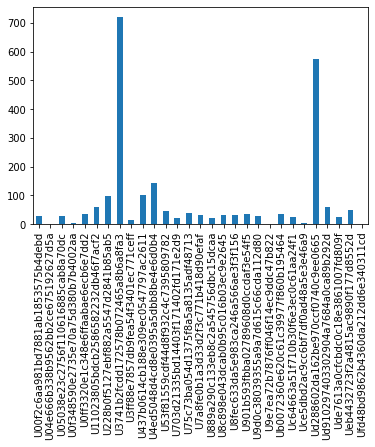

In [21]:
"""
看看誰發的話多

"""
# merge_data["userId"].value_counts()


merge_data["userId"].value_counts().sort_index().plot.bar()
# merge_data["timestamp"].plot.hist()

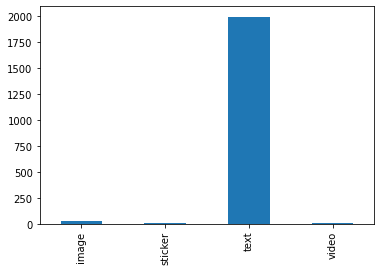

In [22]:
"""
看看都發哪一類型的消息

"""
# merge_data["message_type"]

merge_data["message_type"].value_counts().sort_index().plot.bar()